In [61]:
!pip install xgboost

/Users/tanishrajput/.zshenv:1: bad assignment
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.4 MB/s eta 0:00:00


# Import Libraries

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier 
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
%matplotlib inline

# Load Dataset

In [6]:
df = pd.read_csv('creditcard.csv')

### Explore and Understand the Data

In [7]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df.shape

(284807, 31)

In [11]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

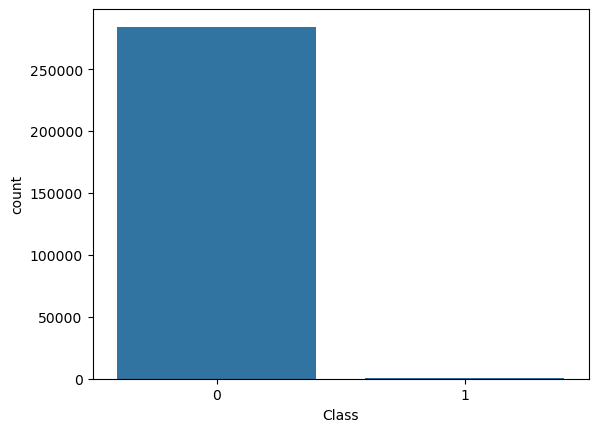

In [17]:
sns.countplot(x='Class', data=df)

## Data Preprocessing

In [18]:
scaler = StandardScaler()

In [19]:
df['normAmount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['normTime'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

In [20]:
df = df.drop(['Time', 'Amount'], axis=1)

## Train-Test Split

In [22]:
X = df.drop('Class',axis = 1)
y = df['Class']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [26]:
X_train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,normAmount,normTime
265518,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,-0.157403,...,0.076197,0.297537,0.307915,0.690980,-0.350316,-0.388907,0.077641,-0.032248,-0.323963,1.413095
180305,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,0.284864,...,0.038628,0.228197,0.035542,0.707090,0.512885,-0.471198,0.002520,-0.069002,-0.341275,0.624644
42664,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,-2.009561,...,-2.798352,0.109526,-0.436530,-0.932803,0.826684,0.913773,0.038049,0.185340,0.346835,-1.129186
198723,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,1.756121,...,-0.139670,0.077013,0.208310,-0.538236,-0.278032,-0.162068,0.018045,-0.063005,-0.328841,0.796203
82325,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,-0.558955,...,-0.243245,-0.173298,-0.006692,-1.362383,-0.292234,-0.144622,-0.032580,-0.064194,-0.008994,-0.746606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233802,1.993864,-0.516866,-0.620118,0.129845,-0.285128,0.395044,-0.822358,0.231591,0.995898,0.212619,...,0.262526,0.884510,0.099141,0.275689,-0.195404,0.623598,-0.032455,-0.058552,-0.329281,1.113883
85418,-1.497933,0.657921,1.581568,-0.024286,0.584698,1.303031,0.609212,0.135561,0.452745,0.108640,...,-0.072452,0.299172,0.110048,-0.615980,-0.425883,0.263968,-0.448445,0.045178,-0.205340,-0.717019
29062,1.069777,0.072105,0.496540,1.505318,-0.380277,-0.370243,0.100551,-0.026687,0.319684,-0.131553,...,-0.061991,-0.044629,-0.050485,0.400171,0.593314,-0.335160,0.031014,0.024886,-0.171636,-1.253217
13766,1.280465,0.300586,0.333044,0.512720,0.065052,-0.145844,-0.145519,-0.091833,1.111187,-0.268878,...,-0.409934,-0.961351,0.033153,-0.560429,0.278428,0.089546,-0.059835,-0.005887,-0.349671,-1.482496


In [27]:
y_train

265518    0
180305    0
42664     0
198723    0
82325     0
         ..
233802    0
85418     0
29062     0
13766     0
17677     0
Name: Class, Length: 227845, dtype: int64

## Handle Class Imbalance

In [29]:
print(type(X_train))
print(type(y_train))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [36]:
print(X_train.shape)
print(y_train.shape)

(227845, 30)
(227845,)


In [42]:
X_train.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'normAmount',
       'normTime'],
      dtype='object')

In [35]:
# print(X_train.isnull().sum())
# print(y_train.isnull().sum())

In [37]:
print(y_train.unique())

[0 1]


In [38]:
print(y_train.value_counts())

Class
0    227451
1       394
Name: count, dtype: int64


In [43]:
# Check if there are any None values in the entire DataFrame
if X_train.isnull().values.any():
    print("There are missing values (None or NaN) in the dataset.")
else:
    print("No missing values (None or NaN) found in the dataset.")

No missing values (None or NaN) found in the dataset.


In [44]:
# Check if there are any missing values in y_train
if y_train.isnull().any():
    print("There are missing values (None or NaN) in y_train.")
else:
    print("No missing values (None or NaN) found in y_train.")

No missing values (None or NaN) found in y_train.


In [45]:
print(f"X_train dtype: {X_train.dtypes}")
print(f"y_train dtype: {y_train.dtype}")

X_train dtype: V1            float64
V2            float64
V3            float64
V4            float64
V5            float64
V6            float64
V7            float64
V8            float64
V9            float64
V10           float64
V11           float64
V12           float64
V13           float64
V14           float64
V15           float64
V16           float64
V17           float64
V18           float64
V19           float64
V20           float64
V21           float64
V22           float64
V23           float64
V24           float64
V25           float64
V26           float64
V27           float64
V28           float64
normAmount    float64
normTime      float64
dtype: object
y_train dtype: int64


In [47]:
ros = RandomOverSampler(random_state=42)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

## Modeling

### Random Forest

In [52]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)

### Bagging Classifier

In [55]:
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(),
                            n_estimators=100,
                            random_state=42)
bagging.fit(X_train_res, y_train_res)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

## Boosting Methods

#### a) AdaBoost

In [57]:
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train_res, y_train_res)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100, random_state=42)

#### Gradient Boosting

In [59]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(random_state=42)

#### XGBoost

In [63]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_res, y_train_res)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:04:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

### Stacking

In [68]:
estimators = [
    ('rf', rf),
    ('lr', LogisticRegression(max_iter=1000))
]

# Faster meta-learner
from sklearn.tree import DecisionTreeClassifier
stack = StackingClassifier(
    estimators=estimators,
    final_estimator=DecisionTreeClassifier(max_depth=3),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

stack.fit(X_train_res, y_train_res)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=DecisionTreeClassifier(max_depth=3),
                   n_jobs=-1, passthrough=True)

In [75]:
stack.fit(X_train_res, y_train_res)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(class_weight='balanced',
                                                       random_state=42)),
                               ('lr', LogisticRegression(max_iter=1000))],
                   final_estimator=DecisionTreeClassifier(max_depth=3),
                   n_jobs=-1, passthrough=True)

### Saving Models

In [76]:
import pickle
import os

# Create directory to save models
model_dir = "saved_models"
os.makedirs(model_dir, exist_ok=True)

# Save models using pickle
with open(os.path.join(model_dir, 'random_forest_model.pkl'), 'wb') as f:
    pickle.dump(rf, f)

with open(os.path.join(model_dir, 'bagging_model.pkl'), 'wb') as f:
    pickle.dump(bagging, f)

with open(os.path.join(model_dir, 'adaboost_model.pkl'), 'wb') as f:
    pickle.dump(ada, f)

with open(os.path.join(model_dir, 'gradient_boosting_model.pkl'), 'wb') as f:
    pickle.dump(gb, f)

with open(os.path.join(model_dir, 'xgboost_model.pkl'), 'wb') as f:
    pickle.dump(xgb_model, f)

with open(os.path.join(model_dir, 'stacking_model.pkl'), 'wb') as f:
    pickle.dump(stack, f)


### Evaluation Function 

In [77]:
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall, precision)
    roc = roc_auc_score(y_test, y_proba)

    print(f"\n=== {name} ===")
    print("AUC-ROC:", roc)
    print("AUC-PR:", pr_auc)
    print(classification_report(y_test, y_pred))


In [78]:
evaluate_model(rf, "Random Forest")
evaluate_model(bagging, "Bagging")
evaluate_model(ada, "AdaBoost")
evaluate_model(gb, "Gradient Boosting")
evaluate_model(xgb_model, "XGBoost")
evaluate_model(stack, "Stacking Ensemble")


=== Random Forest ===
AUC-ROC: 0.9577267422163012
AUC-PR: 0.8692131491656672
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.78      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962


=== Bagging ===
AUC-ROC: 0.9073677761763118
AUC-PR: 0.7593888654718778
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.78      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962


=== AdaBoost ===
AUC-ROC: 0.975554814638292
AUC-PR: 0.8116462112957096
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1   

### Comparing All Models

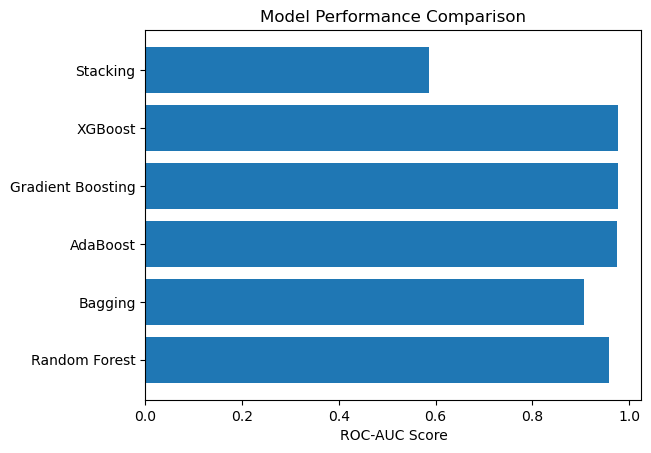

In [79]:
model_scores = {
    "Random Forest": roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
    "Bagging": roc_auc_score(y_test, bagging.predict_proba(X_test)[:,1]),
    "AdaBoost": roc_auc_score(y_test, ada.predict_proba(X_test)[:,1]),
    "Gradient Boosting": roc_auc_score(y_test, gb.predict_proba(X_test)[:,1]),
    "XGBoost": roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:,1]),
    "Stacking": roc_auc_score(y_test, stack.predict_proba(X_test)[:,1])
}

plt.barh(list(model_scores.keys()), list(model_scores.values()))
plt.xlabel("ROC-AUC Score")
plt.title("Model Performance Comparison")
plt.show()

### Testing Accuracy for All Models

In [80]:
model_dir = "saved_models"

model_files = {
    'Random Forest': 'random_forest_model.pkl',
    'Bagging': 'bagging_model.pkl',
    'AdaBoost': 'adaboost_model.pkl',
    'Gradient Boosting': 'gradient_boosting_model.pkl',
    'XGBoost': 'xgboost_model.pkl',
    'Stacking': 'stacking_model.pkl'
}

for name, filename in model_files.items():
    model_path = os.path.join(model_dir, filename)
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Testing Accuracy: {acc:.4f}")

Random Forest Testing Accuracy: 0.9995
Bagging Testing Accuracy: 0.9994
AdaBoost Testing Accuracy: 0.9898
Gradient Boosting Testing Accuracy: 0.9919
XGBoost Testing Accuracy: 0.9996
Stacking Testing Accuracy: 0.9986
